In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
import tensorflow.keras as keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dense, Activation, Dropout, LSTM, Bidirectional,SimpleRNN,GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM, Dropout
from keras.callbacks import LambdaCallback
from keras.layers import TimeDistributed
from keras.optimizers import RMSprop
from keras.utils import plot_model
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/imdb.csv')

In [4]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [7]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


In [6]:
def preporcessing(df):
    for i in range(len(df)):
        df['review'].iloc[i] = df['review'].iloc[i].replace('<br />','')
        df['review'].iloc[i] = df['review'].iloc[i].lower()
    return df
        
df = preporcessing(df)

In [7]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [8]:
df['review'].fillna('').apply(lambda x:len(x.split())).max()

2450

In [9]:
X = df['review']
y = df['sentiment']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, shuffle=True)

In [11]:
X_train.fillna('').apply(lambda x:len(x.split())).max()

2450

In [12]:
X_test.fillna('').apply(lambda x:len(x.split())).max()

1709

In [13]:
X_train = X_train.values
X_test = X_test.values

In [14]:
y_train = y_train.apply(lambda x:1 if x=='positive' else 0)
y_test = y_test.apply(lambda x:1 if x=='positive' else 0)

In [15]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

In [16]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [17]:
vocab_size = len(tokenizer.word_index) + 1


In [18]:
maxlen = 2500
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [19]:
X_train # note: this is different every time

array([[1111,  756,    8, ...,    0,    0,    0],
       [   1,    4,   10, ...,    0,    0,    0],
       [1441,  951,    6, ...,    0,    0,    0],
       ...,
       [1301,   11,  251, ...,    0,    0,    0],
       [ 825,    1, 1161, ...,    0,    0,    0],
       [   1, 3511,    6, ...,    0,    0,    0]], dtype=int32)

In [20]:
np.mean(y_train)

0.49945

In [ ]:
embedding_dim = 50

model_1 = Sequential()
model_1.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(10, activation='relu'))
model_1.add(layers.Dense(1, activation='sigmoid'))
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2500, 50)          5705250   
                                                                 
 flatten_1 (Flatten)         (None, 125000)            0         
                                                                 
 dense_2 (Dense)             (None, 10)                1250010   
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,955,271
Trainable params: 6,955,271
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
800/800 [==============================] - 90s 112ms/step - loss: 0.3824 - accuracy: 0.8235 - val_loss: 0.2783 - val_accuracy: 0.8846
Epoch 2/10
800/800 [==============================] - 90s 112ms/step - loss: 0.2042 - accuracy: 0.9215 - val_loss: 0.2754 - val_accuracy: 0.8923
Epoch 3/10
800/800 [==============================] - 88s 110ms/step - loss: 0.0947 - accuracy: 0.9715 - val_loss: 0.3427 - val_accuracy: 0.8825
Epoch 4/10
800/800 [==============================] - 91s 114ms/step - loss: 0.0243 - accuracy: 0.9961 - val_loss: 0.4134 - val_accuracy: 0.8797
Epoch 5/10
800/800 [==============================] - 90s 113ms/step - loss: 0.0055 - accuracy: 0.9995 - val_loss: 0.4547 - val_accuracy: 0.8814
Epoch 6/10
800/800 [==============================] - 90s 112ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.5339 - val_accuracy: 0.8835
Epoch 7/10
800/800 [==============================] - 90s 112ms/step - loss: 5.3712e-04 - accuracy: 1.0000 - val_loss: 0.5744 - va

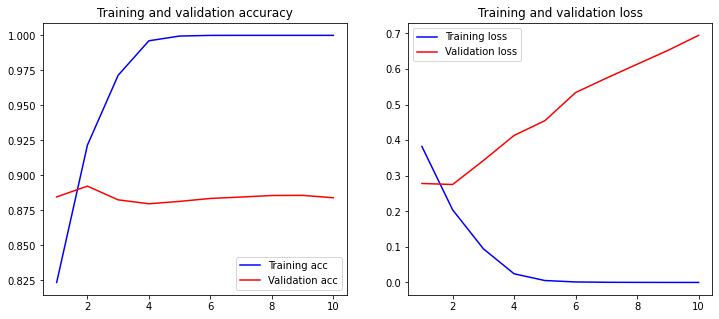

In [ ]:
history   = model_1.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=50)
loss, accuracy = model_1.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
embedding_dim = 50
shortenlen = 500

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=shortenlen))
# model.add(layers.Embedding(input_dim = 500, output_dim=embedding_dim))
model.add(layers.Masking(mask_value=0.0, input_shape=(None,embedding_dim)))
model.add(layers.LSTM(50,activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train[:,:shortenlen], y_train,
                    epochs=2,
                    # verbose=True,
                    validation_data=(X_test[:,:shortenlen], y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 500, 50)           5705250   
                                                                 
 masking_11 (Masking)        (None, 500, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,725,501
Trainable params: 5,725,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
 756/1250 [=================>............] - ETA: 2:51 - loss: nan - accuracy: 0.4980

KeyboardInterrupt: ignored

In [ ]:
from bs4 import BeautifulSoup
import requests 

In [ ]:
url = 'https://www.imdb.com/title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey='

In [ ]:
result = requests.get(url)

In [ ]:
doc = BeautifulSoup(result.text,'html.parser')
div_all = doc.find_all('div')
div_all[4]

<div class="lister-item-content">
<a class="title" href="/review/rw5478826/"> The Dark Knight
</a> <div class="display-name-date">
<span class="display-name-link"><a href="/user/ur87850731/">MR-ODIN</a></span><span class="review-date">12 February 2020</span>
</div>
<div class="content">
<div class="text show-more__control">Confidently directed, dark, brooding, and packed with impressive action sequences and a complex story, The Dark Knight includes a career-defining turn from Heath Ledger as well as other Oscar worthy performances, TDK remains not only the best Batman movie, but comic book movie ever created.</div>
<div class="actions text-muted">
                    485 out of 525 found this helpful.
                        <span>
                            Was this review helpful? <a href="/registration/signin"> Sign in</a> to vote.
                        </span>
<br/>
<a href="/review/rw5478826/">Permalink</a>
</div>
</div>
</div>

In [38]:
import os
 
# Get the list of all files and directories
# path = "C:/Users/Neelesh Reddypelli/Documents/3rd Semester/DeepLearning/Projects/2_reviews_per_movie_raw"
path = "/content/drive/MyDrive/Deep-Learning-Movie-Reviews/2_reviews_per_movie_raw"
dir_list = os.listdir(path)
 
print("Files and directories in '", path, "' :")
 
# prints all files
for i in range(len(dir_list)):
    
    
    dir_list[i] = dir_list[i].replace('.csv','')
    dir_list[i] = dir_list[i][:len(dir_list[i]) - 5]
    
    
print(len(dir_list))


Files and directories in ' /content/drive/MyDrive/Deep-Learning-Movie-Reviews/2_reviews_per_movie_raw ' :
47


In [51]:
df_1 = pd.read_csv('/content/drive/MyDrive/Deep-Learning-Movie-Reviews/10 Cloverfield Lane 2016.csv')

FileNotFoundError: ignored

In [ ]:
i=1
df{i} = 'df'+str(i)+''

In [ ]:
df_1

,username,rating,helpful,total,date,title,review
0,Imme-van-Gorp,7,102,123,30 January 2019,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...
1,sonofocelot-1,5,385,500,10 May 2016,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...
2,mhodaee,5,110,143,4 August 2017,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...
3,fil-nik09,5,73,100,5 October 2016,Hmmm...\n,"First of all, I must say that I was expecting ..."
4,DVR_Brale,7,42,56,27 July 2016,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...
...,...,...,...,...,...,...,...
747,maurice_yacowar,8,0,2,13 March 2016,Resourceful woman survives villain and monster\n,Just because you're paranoid doesn't mean the ...
748,stevendbeard,7,0,3,11 March 2016,"Related, But Not Really A Sequel\n","I saw ""10 Cloverfield Lane"", starring John Goo..."
749,jmoneyjohal,7,0,3,11 March 2016,A good psychological thriller about the unkno...,"10 Cloverfield Lane,is what I classify as a fi..."
750,MattBirk,8,0,2,11 March 2016,"An amazing mystery thriller, undermined by it...","I'll get this out of the way early, I firmly b..."


In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
action = pd.read_csv('movies_reviews\Action.csv') 

In [ ]:
action

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url
0,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...
1,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820,https://www.imdb.com/title/tt1375666/reviews/_...
2,The Matrix,1999,R,2h 16min,Action; Sci-Fi;,31 March 1999 (USA),8.7,1619761,4281,https://www.imdb.com/title/tt0133093/reviews/_...
3,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365,https://www.imdb.com/title/tt0120737/reviews/_...
4,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979,https://www.imdb.com/title/tt1345836/reviews/_...
...,...,...,...,...,...,...,...,...,...,...
95,Harry Potter and the Order of the Phoenix,2007,PG-13,2h 18min,Action; Adventure;,11 July 2007 (USA),7.5,489759,1189,https://www.imdb.com/title/tt0373889/reviews/_...
96,Spider-Man: Homecoming,2017,PG-13,2h 13min,Action; Adventure; Sci-Fi;,7 July 2017 (USA),7.4,488794,1356,https://www.imdb.com/title/tt2250912/reviews/_...
97,Rise of the Planet of the Apes,2011,PG-13,1h 45min,Action; Drama; Sci-Fi;,5 August 2011 (USA),7.6,488748,706,https://www.imdb.com/title/tt1318514/reviews/_...
98,"I, Robot",2004,PG-13,1h 55min,Action; Drama; Sci-Fi;,16 July 2004 (USA),7.1,488324,839,https://www.imdb.com/title/tt0343818/reviews/_...


In [ ]:
action = list(action['name']) 
for i in range(len(action)):
    action[i] = action[i].replace(':','_')

In [ ]:
len(action)

100

In [ ]:
[i for i in action if i in dir_list]

['The Dark Knight',
 'Inception',
 'The Matrix',
 'The Lord of the Rings_ The Fellowship of the Ring',
 'The Dark Knight Rises',
 'Gladiator',
 'Batman Begins',
 'The Avengers',
 'Star Wars_ Episode IV - A New Hope',
 'Star Wars_ Episode V - The Empire Strikes Back',
 'Avatar',
 'Guardians of the Galaxy',
 'V for Vendetta',
 'Léon_ The Professional',
 'Pirates of the Caribbean_ The Curse of the Black Pearl',
 'Kill Bill_ Vol. 1',
 'Terminator 2_ Judgment Day',
 'Star Wars_ Episode VI - Return of the Jedi',
 'Iron Man',
 'Deadpool',
 'Raiders of the Lost Ark',
 'Mad Max_ Fury Road',
 'Star Wars_ Episode VII - The Force Awakens',
 'Jurassic Park',
 'The Hunger Games',
 'Avengers_ Infinity War',
 'The Terminator',
 'Die Hard',
 'Avengers_ Endgame',
 'Iron Man 3',
 'Thor',
 '300',
 'Captain America_ The First Avenger',
 'Avengers_ Age of Ultron',
 'Captain America_ The Winter Soldier',
 'Star Wars_ Episode I - The Phantom Menace',
 'Iron Man 2',
 'Star Wars_ Episode III - Revenge of the Si

In [4]:
df = pd.read_csv('/content/drive/MyDrive/imdb.csv')

In [4]:
# reviews is a pandas series
def preprocess_reviews(reviews):
  reviews_processed = reviews.str.replace('<br />','')
  reviews_processed = reviews.str.lower()
  return reviews_processed

df['review'] = preprocess_reviews(df['review'])

X = df['review'].values
y = df['sentiment'].apply(lambda x:1 if x=='positive' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, shuffle=True)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

In [5]:
maxlen = 100
X_train = pad_sequences(X_train_token, padding='pre', maxlen=maxlen)
X_test = pad_sequences(X_test_token, padding='pre', maxlen=maxlen)

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.LSTM(50,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=2,
                    # verbose=True,
                    validation_data=(X_test, y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           5610350   
                                                                 
 lstm (LSTM)                 (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 10)                510       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5,631,071
Trainable params: 5,631,071
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1250/1250 [==============================] - 142s 111ms/step - loss: 535882.3125 - accuracy: 0.6849 - val_loss: 7.3161 - val_accuracy: 0.7107
Epoch 2/2
1250/1250 [=====

NameError: ignored

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 100, 50)           5722800   
                                                                 
 lstm_18 (LSTM)              (None, 50)                20200     
                                                                 
 dense_22 (Dense)            (None, 10)                510       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,743,521
Trainable params: 5,743,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1250/1250 [==============================] - 140s 111ms/step - loss: 58458.2266 - accuracy: 0.6982 - val_loss: 0.5711 - val_accuracy: 0.7275
Epoch 2/5
1250/1250 [===

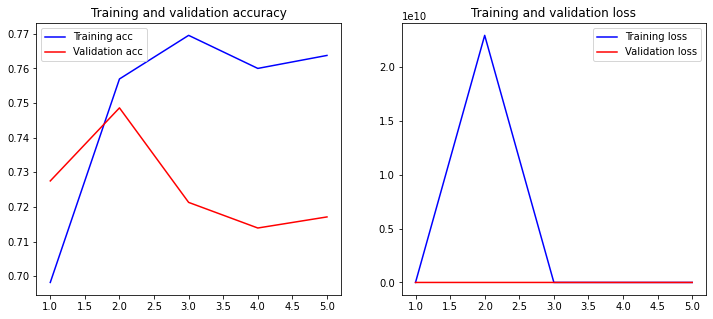

In [ ]:
maxlen = 100
X_train = pad_sequences(X_train_token, padding='pre', maxlen=maxlen)
X_test = pad_sequences(X_test_token, padding='pre', maxlen=maxlen)

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.LSTM(50,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=5,
                    # verbose=True,
                    validation_data=(X_test, y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 100, 50)           5722800   
                                                                 
 simple_rnn (SimpleRNN)      (None, 50)                5050      
                                                                 
 dense_24 (Dense)            (None, 10)                510       
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,728,371
Trainable params: 5,728,371
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1250/1250 [==============================] - 112s 87ms/step - loss: 0.4446 - accuracy: 0.7843 - val_loss: 0.3582 - val_accuracy: 0.8485
Epoch 2/5
1250/1250 [========

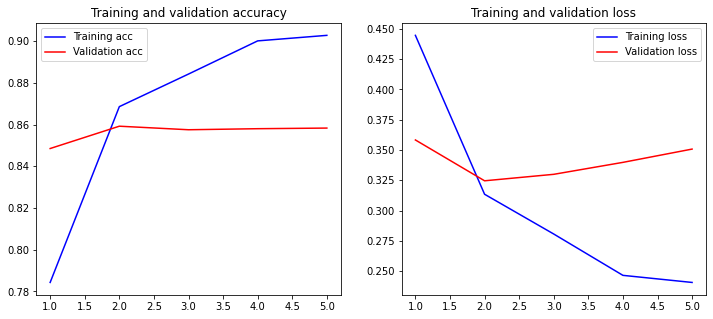

In [ ]:
maxlen = 100
X_train = pad_sequences(X_train_token, padding='pre', maxlen=maxlen)
X_test = pad_sequences(X_test_token, padding='pre', maxlen=maxlen)

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.SimpleRNN(50,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=5,
                    # verbose=True,
                    validation_data=(X_test, y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 50)           5711350   
                                                                 
 gru (GRU)                   (None, 50)                15300     
                                                                 
 dense_8 (Dense)             (None, 10)                510       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5,727,171
Trainable params: 5,727,171
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1250/1250 [==============================] - 136s 108ms/step - loss: 0.4850 - accuracy: 0.7604 - val_loss: 0.3583 - val_accuracy: 0.8519
Epoch 2/5
1250/1250 [========

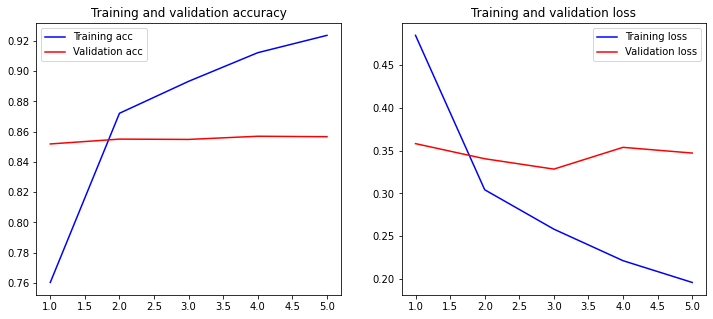

In [29]:
maxlen = 100
X_train = pad_sequences(X_train_token, padding='pre', maxlen=maxlen)
X_test = pad_sequences(X_test_token, padding='pre', maxlen=maxlen)

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GRU(50,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=5,
                    # verbose=True,
                    validation_data=(X_test, y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [9]:
movie_df = pd.read_csv('/content/drive/MyDrive/Deep-Learning-Movie-Reviews/2_reviews_per_movie_raw/50_50 2011.csv')

In [7]:
# reviews: np vector of reviews (in text form)
# model: a keras model
### returns: flattened np array of predictions (1 for positive, 0 for negative) 
def predict_pos(reviews, model):
  X = preprocess_reviews(reviews).values
  X_token = tokenizer.texts_to_sequences(X)

  maxlen = model.layers[0].input_shape[1] # note: may be fragile
  X_token = pad_sequences(X_token, padding='pre', maxlen=maxlen)
  preds = model.predict(X_token).flatten()
  return (preds >= 0.5).astype(int)

predict_pos(movie_df['review'], model)

39/39 [==============================] - 1s 13ms/step


array([1, 1, 1, ..., 1, 0, 1])

In [9]:
# (IN PROGRESS)
# Get the number of positive and negative reviews for each movie
path = "/content/drive/MyDrive/Deep-Learning-Movie-Reviews/2_reviews_per_movie_raw/"
dir_list = os.listdir(path)

print(len(dir_list))
res = []
for fname in dir_list:
  movie_df = pd.read_csv(path + fname)
  preds = predict_pos(movie_df['review'], model)
  res.append({
    "Movie": fname,
    "Positive": np.sum(preds),
    "Negative": len(preds) - np.sum(preds),
    "Mean": np.mean(preds)
  })

# print(res)
pd.DataFrame(res)

1149
8/8 [==============================] - 0s 15ms/step


,Movie,Positive,Negative,Mean
0,Braveheart 1995.csv,895,344,0.722357
1,Bruce Almighty 2003.csv,376,262,0.589342
2,Capote 2005.csv,303,145,0.676339
3,Caddyshack 1980.csv,173,105,0.622302
4,Bohemian Rhapsody 2018.csv,2399,933,0.719988
...,...,...,...,...
1144,Bridesmaids 2011.csv,289,274,0.513321
1145,Bolt 2008.csv,159,55,0.742991
1146,Burn After Reading 2008.csv,308,314,0.495177
1147,Born on the Fourth of July 1989.csv,137,66,0.674877


In [10]:
pd.DataFrame(res).to_csv('/content/drive/MyDrive/Deep-Learning-Movie-Reviews/model-outputs/model11292022.csv', mode='a', header=True)

In [16]:
path = "/content/drive/MyDrive/Deep-Learning-Movie-Reviews/1_movies_per_genre/"
genres_list = os.listdir(path)
movies_df = pd.DataFrame()
for fname in genres_list:
  movie_df = pd.read_csv(path + fname)
  movies_df = pd.concat([movies_df, movie_df])

movies_df

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url
0,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...
1,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820,https://www.imdb.com/title/tt1375666/reviews/_...
2,The Matrix,1999,R,2h 16min,Action; Sci-Fi;,31 March 1999 (USA),8.7,1619761,4281,https://www.imdb.com/title/tt0133093/reviews/_...
3,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365,https://www.imdb.com/title/tt0120737/reviews/_...
4,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979,https://www.imdb.com/title/tt1345836/reviews/_...
...,...,...,...,...,...,...,...,...,...,...
95,Spider-Man 2,2004,PG-13,2h 7min,Action; Adventure; Sci-Fi;,30 June 2004 (USA),7.3,529344,1450,https://www.imdb.com/title/tt0316654/reviews/_...
96,Harry Potter and the Prisoner of Azkaban,2004,PG,2h 22min,Adventure; Fantasy;,4 June 2004 (USA),7.9,528503,1592,https://www.imdb.com/title/tt0304141/reviews/_...
97,Harry Potter and the Goblet of Fire,2005,PG-13,2h 37min,Adventure; Fantasy;,18 November 2005 (USA),7.7,526115,1980,https://www.imdb.com/title/tt0330373/reviews/_...
98,Independence Day,1996,PG-13,2h 25min,Action; Adventure; Sci-Fi;,3 July 1996 (USA),7.0,516789,939,https://www.imdb.com/title/tt0116629/reviews/_...


In [28]:
review_counts = pd.DataFrame(res)

In [34]:
# add a column for which csv of reviews correspond to the given movie
movies_df['reviews_csv'] = movies_df['name'] + ' ' + movies_df['year'].astype(str) + '.csv'

# left join review counts to movie info
movies_df = movies_df.set_index('reviews_csv').join(pd.DataFrame(res).set_index('Movie'))

movies_df

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url,Positive,Negative,Mean
10 Cloverfield Lane 2016.csv,10 Cloverfield Lane,2016,PG-13,1h 43min,Drama; Horror; Mystery;,11 March 2016 (USA),7.2,280919,752,https://www.imdb.com/title/tt1179933/reviews/_...,438.0,314.0,0.582447
10 Cloverfield Lane 2016.csv,10 Cloverfield Lane,2016,PG-13,1h 43min,Drama; Horror; Mystery;,11 March 2016 (USA),7.2,280920,752,https://www.imdb.com/title/tt1179933/reviews/_...,438.0,314.0,0.582447
10 Things I Hate About You 1999.csv,10 Things I Hate About You,1999,PG-13,1h 37min,Comedy; Romance;,31 March 1999 (USA),7.3,287665,616,https://www.imdb.com/title/tt0147800/reviews/_...,414.0,197.0,0.677578
12 Angry Men 1957.csv,12 Angry Men,1957,Approved,1h 36min,Crime; Drama;,10 April 1957 (USA),8.9,661761,1575,https://www.imdb.com/title/tt0050083/reviews/_...,1076.0,435.0,0.712111
12 Angry Men 1957.csv,12 Angry Men,1957,Approved,1h 36min,Crime; Drama;,10 April 1957 (USA),8.9,661761,1575,https://www.imdb.com/title/tt0050083/reviews/_...,1076.0,435.0,0.712111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zombieland 2009.csv,Zombieland,2009,R,1h 28min,Comedy;,2 October 2009 (USA),7.6,507445,712,https://www.imdb.com/title/tt1156398/reviews/_...,403.0,310.0,0.565217
Zombieland 2009.csv,Zombieland,2009,R,1h 28min,Adventure; Comedy; Fantasy;,2 October 2009 (USA),7.6,507361,713,https://www.imdb.com/title/tt1156398/reviews/_...,403.0,310.0,0.565217
Zootopia 2016.csv,Zootopia,2016,PG,1h 48min,Animation; Adventure; Comedy;,4 March 2016 (USA),8.0,417226,710,https://www.imdb.com/title/tt2948356/reviews/_...,516.0,185.0,0.736091
Zootopia 2016.csv,Zootopia,2016,PG,1h 48min,Comedy;,4 March 2016 (USA),8.0,417325,711,https://www.imdb.com/title/tt2948356/reviews/_...,516.0,185.0,0.736091


In [39]:
# There are missing values!
# TODO: figure out why this is
movies_df['Positive'].isnull().sum()

186

In [32]:
movies_df.describe()

,year,rating,num_raters,num_reviews
count,1700.000000,1700.000000,1.700000e+03,1700.000000
mean,2002.798235,7.457706,4.134152e+05,1003.601176
std,14.359010,0.736682,3.277902e+05,1045.584805
min,1915.000000,3.500000,1.929000e+04,102.000000
25%,1999.000000,7.000000,1.812258e+05,393.750000
50%,2006.000000,7.600000,3.445890e+05,719.500000
75%,2012.000000,8.000000,5.722170e+05,1256.500000
max,2020.000000,9.300000,2.258845e+06,10279.000000


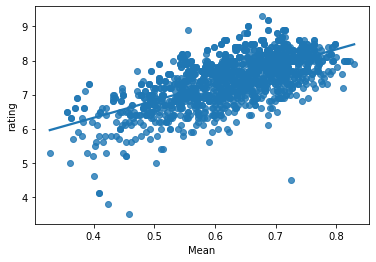

In [59]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.regplot(x = "Mean", y = "rating", ci = None, data = movies_df)